def suma(a,b):
    c = a+b
    return c



#resultado = suma(3,5)

#resultado

suma(3,5)


[insertar imagenes, metodos](https://stackoverflow.com/questions/46439874/display-image-jupyter-notebook-aligned-centre)

In [1]:
import pandas as pd
import numpy as np

zonas = pd.read_excel('Matrices/Códigos de Zonas_tp.xlsx')
df_distancias = pd.read_excel('Matrices/Matriz distancias_tp.xlsx')

##### Convierte el Excel de Distancias en un Data Frame
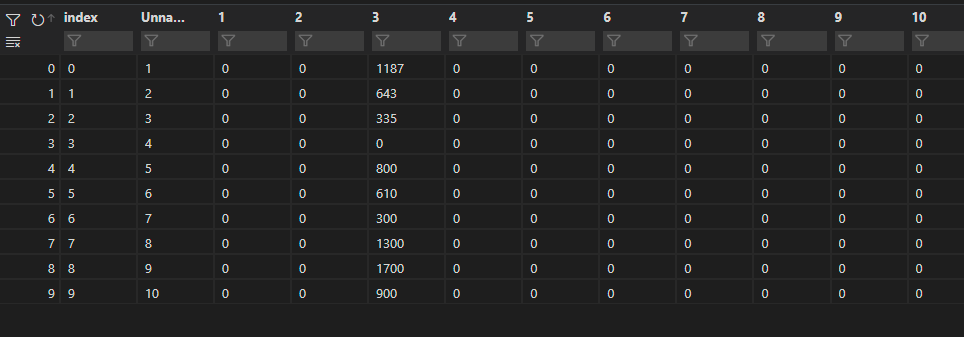

In [2]:
def trans_xlmatriz_a_df(ruta_matrizod, hoja):
    """ Lee la matriz de la pestaña determinada de un excel con matrices OD de 10 zonas
    y la tranforma en un DataFrame
    """
    return pd.read_excel(ruta_matrizod, sheet_name=hoja, usecols=(range(1,11)))

In [3]:
def trans_df_a_lista(df_producto):
    """ Transforma un DataFrame de pandas con datos de una matriz OD de 122 zonas 
    a una lista de bibliotecas con los datos indexados con cargas, origen, destino y distancias.
    Recorre todos los orígenes hacia el primer destino y así sucesivamente, o sea la fila cambia y la columna es
    constante hasta que recorre todos los orígenes posibles.
    """
    lista = []
    x = 0
    y = 0
    while y < 9:
        while x < 10:
            conjunto = {}
            conjunto['Origen'] = zonas.iat[x,3]
            conjunto['ID origen'] = zonas.iat[x,0]
            conjunto['Destino'] = zonas.iat[y,3]
            conjunto['ID destino'] = zonas.iat[y,0]
            conjunto['Carga'] = df_producto[(y+1)][x]
            conjunto['Distancia'] = df_distancias[(y+1)][x]
            lista.append(conjunto)
            x += 1
        x = 0
        y += 1
    #print(lista)
    return lista

In [4]:
def leer_criterio(producto):
    """ Lee un la pesteña deseada dentro del excel con criterios de derivabilidad
    """
    return pd.read_excel('Matrices/Criterios de derivabilidad_tp.xlsx', sheet_name=producto) 

In [5]:
def calcular_derivabilidad(lista_cargas, criterio):
    """ Lee una lista de bibliotecas con informacion de cargas, origen, destino y distancia
    y utiliza criterios de derivavilidad al FFCC para crear una lista nueva similar pero
    con las cargas derivables.
    """
    derivable = []
    for i in lista_cargas:
        conjunto = {}
        conjunto['Origen'] = i['Origen']
        conjunto['ID origen'] = i['ID origen']
        conjunto['Distancia'] = i['Distancia']
        conjunto['ID destino'] = i['ID destino']
        conjunto['Destino'] = i['Destino']
        if 300 > i['Distancia'] >= 200:
            if criterio.iat[2,0] > i['Carga'] >= criterio.iat[3,0] :
                conjunto['Carga'] = i['Carga']*criterio.iat[3,4]
            elif criterio.iat[1,0] > i['Carga'] >= criterio.iat[2,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[2,4]
            elif criterio.iat[0,0] > i['Carga'] >= criterio.iat[1,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[1,4]
            elif i['Carga'] >= criterio.iat[0,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[0,4]
            else:
                conjunto['Carga'] = 0
        elif 400 > i['Distancia'] >= 300:
            if criterio.iat[2,0] > i['Carga'] >= criterio.iat[3,0] :
                conjunto['Carga'] = i['Carga']*criterio.iat[3,3]
            elif criterio.iat[1,0] > i['Carga'] >= criterio.iat[2,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[2,3]
            elif criterio.iat[0,0] > i['Carga'] >= criterio.iat[1,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[1,3]
            elif i['Carga'] >= criterio.iat[0,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[0,3]
            else:
                conjunto['Carga'] = 0
        elif 500 > i['Distancia'] >= 400:
            if criterio.iat[2,0] > i['Carga'] >= criterio.iat[3,0] :
                conjunto['Carga'] = i['Carga']*criterio.iat[3,2]
            elif criterio.iat[1,0] > i['Carga'] >= criterio.iat[2,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[2,2]
            elif criterio.iat[0,0] > i['Carga'] >= criterio.iat[1,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[1,2]
            elif i['Carga'] >= criterio.iat[0,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[0,2]
            else:
                conjunto['Carga'] = 0
        elif i['Distancia'] >= 500:
            if criterio.iat[2,0] > i['Carga'] >= criterio.iat[3,0] :
                conjunto['Carga'] = i['Carga']*criterio.iat[3,1]
            elif criterio.iat[1,0] > i['Carga'] >= criterio.iat[2,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[2,1]
            elif criterio.iat[0,0] > i['Carga'] >= criterio.iat[1,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[1,1]
            elif i['Carga'] >= criterio.iat[0,0]:
                conjunto['Carga'] = i['Carga']*criterio.iat[0,1]
            else:
                conjunto['Carga'] = 0
        else:
            conjunto['Carga'] = 0
        derivable.append(conjunto)
        
    return derivable 


In [6]:
def trans_lista_a_matriz(lista):
    """ Lee una lista de biblioteca con información de cargas, origen y destino
    y la transforma en una matriz para poder realizar operación sobre ella.
    """
    matriz = np.zeros((10,10))
    for x in lista:
        q = ((x['ID destino'])-1)
        w = ((x['ID origen'])-1)
        matriz[w][q] = x['Carga']
    return matriz              

In [7]:
# trbajo final que devuelve al excel de resultado del programa
def trans_matriz_a_xlsx(matriz, ruta):
    """Crea una excel a partir de una matriz OD
    """
    df = pd.DataFrame(matriz, index=(range(1,11)), columns=(range(1,11)))
    df.to_excel(ruta)

In [8]:
def crear_matriz_carga_derivable(ruta_matriz_xls, pestaña, pestaña_criterio):
    """Combina todas las funciones antes declaradas para calcular la derivavilidad
    de la carga a partir de los datos de un excel y de una pestaña determinada,
    con datos matriz OD de Argentina, divido en 123 zonas, aplicando el criterio deseado
    """    
    df_camion = trans_xlmatriz_a_df(ruta_matriz_xls, pestaña) # pestaña= Total Toneladas Mineria
    lista_camion = trans_df_a_lista(df_camion)
    #criterio = leer_criterio(pestaña_criterio)
    #lista_derivable = calcular_derivabilidad(lista_camion, criterio)
    #matriz_derivable = trans_lista_a_matriz(lista_derivable)

    #return df_camion
    return lista_camion
    #return criterio
    #return lista_derivable
    #return matriz_derivable
    

In [9]:
matriz_mineria_derivable = crear_matriz_carga_derivable('Matrices/Matrices Grupo Mineria_tp.xlsx', 'Total Toneladas Mineria 2014','MINERIA')


In [10]:
#matriz_mineria_derivable

In [11]:
#matriz_derivable = matriz_mineria_derivable + matriz_granos_derivable 

In [12]:
#trans_matriz_a_xlsx(matriz_mineria_derivable, 'Matrices/Derivabilidad_mineria_1.xlsx')
#trans_matriz_a_xlsx(matriz_granos_derivable, 'Matrices/Derivabilidad_granos_1.xlsx')
#trans_matriz_a_xlsx(matriz_derivable, 'Matrices/Derivabilidad_tp.xlsx')